In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import gc_utils     #第三部分，梯度校验
#%matplotlib inline #如果你使用的是Jupyter Notebook，请取消注释。
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

梯度检验

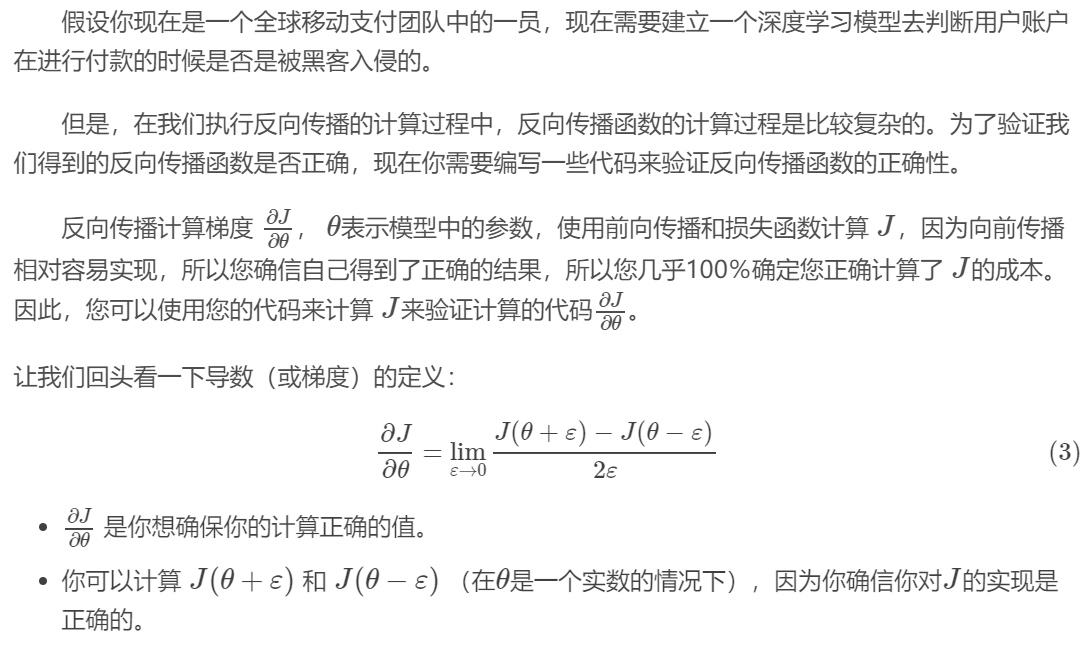

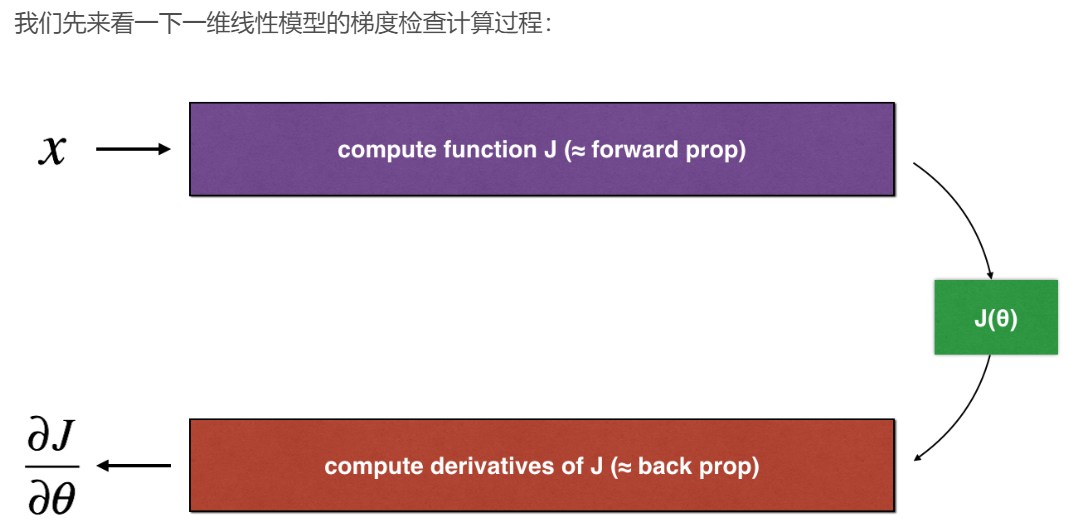

一维线性

In [2]:
def forward_propagation(x,theta):
    """

    实现图中呈现的线性前向传播（计算J）（J（theta）= theta * x）

    参数：
    x  - 一个实值输入
    theta  - 参数，也是一个实数

    返回：
    J  - 函数J的值，用公式J（theta）= theta * x计算
    """
    J = np.dot(theta,x)

    return J

In [3]:
#测试forward_propagation
print("-----------------测试forward_propagation-----------------")
x, theta = 2, 4
J = forward_propagation(x, theta)
print ("J = " + str(J))

-----------------测试forward_propagation-----------------
J = 8


In [4]:
def backward_propagation(x,theta):
    """
    计算J相对于θ的导数。

    参数：
        x  - 一个实值输入
        theta  - 参数，也是一个实数

    返回：
        dtheta  - 相对于θ的成本梯度
    """
    dtheta = x

    return dtheta

In [5]:
#测试backward_propagation
print("-----------------测试backward_propagation-----------------")
x, theta = 2, 4
dtheta = backward_propagation(x, theta)
print ("dtheta = " + str(dtheta))

-----------------测试backward_propagation-----------------
dtheta = 2


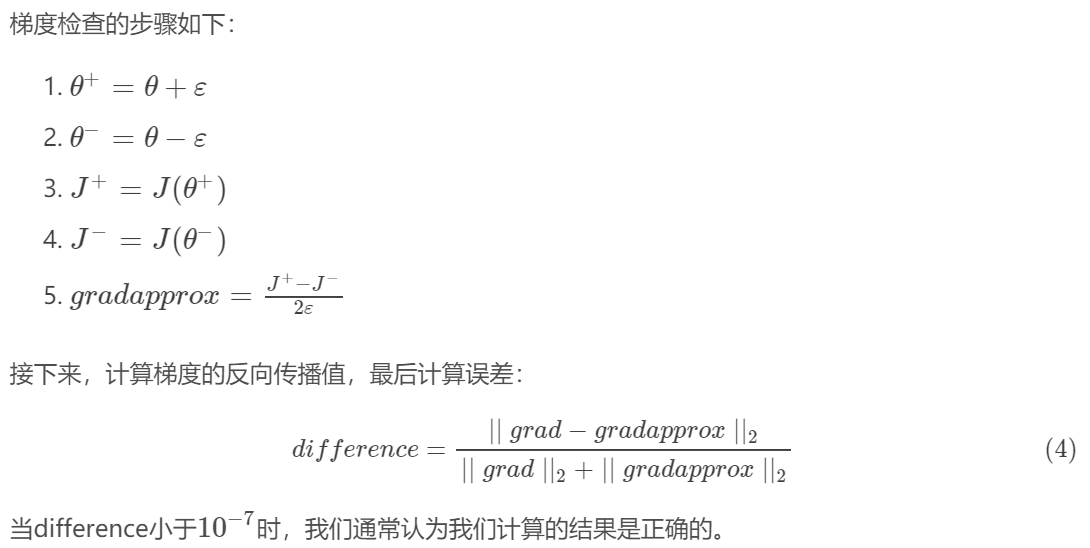

In [6]:
def gradient_check(x,theta,epsilon=1e-7):
    """

    实现图中的反向传播。

    参数：
        x  - 一个实值输入
        theta  - 参数，也是一个实数
        epsilon  - 使用公式（3）计算输入的微小偏移以计算近似梯度

    返回：
        近似梯度和后向传播梯度之间的差异
    """

    #使用公式（3）的左侧计算gradapprox。
    thetaplus = theta + epsilon                               # Step 1
    thetaminus = theta - epsilon                              # Step 2
    J_plus = forward_propagation(x, thetaplus)                # Step 3
    J_minus = forward_propagation(x, thetaminus)              # Step 4
    gradapprox = (J_plus - J_minus) / (2 * epsilon)           # Step 5


    #检查gradapprox是否足够接近backward_propagation（）的输出
    grad = backward_propagation(x, theta)

    numerator = np.linalg.norm(grad - gradapprox)                      # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)    # Step 2'
    difference = numerator / denominator                               # Step 3'

    if difference < 1e-7:
        print("梯度检查：梯度正常!")
    else:
        print("梯度检查：梯度超出阈值!")

    return difference

In [7]:
#测试gradient_check
print("-----------------测试gradient_check-----------------")
x, theta = 2, 4
difference = gradient_check(x, theta)
print("difference = " + str(difference))

-----------------测试gradient_check-----------------
梯度检查：梯度正常!
difference = 2.919335883291695e-10


高维梯度的参考链接：https://blog.csdn.net/u013733326/article/details/79847918